In [1]:
import csv  # Import the csv module to work with CSV files
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
import random

In [2]:
from zumi.zumi import Zumi
from zumi.util.screen import Screen
import time

zumi = Zumi()
screen = Screen()

 Try loading previous data, if exists. Otherwise, start with an empty list.
 This will store our sensor readings and labels.
try:
   with open('zumi_data.pkl', 'rb') as file:
       data = pickle.load(file)
except FileNotFoundError:
      data = [] # This will store our sensor readings and labels.
        
IR_FRONT_RIGHT = 0
IR_FRONT_LEFT = 5

 #Function to collect data.
#def collect_data(obstacle_label):
     #Read from front infrared sensors.
#    front_left = zumi.get_IR_data(IR_FRONT_LEFT)
#    front_right = zumi.get_IR_data(IR_FRONT_RIGHT)
    
    #Create a dictionary for each data point and then append it to the data list
  #  data_point = {'front_left': front_left, 'front_right': front_right, 'label': obstacle_label}
 #   data.append(data_point)
    
    #return data_point

def collect_data(obstacle_label):
    # Read from front infrared sensors.
    front_left_clean = zumi.get_IR_data(IR_FRONT_LEFT)
    front_right_clean = zumi.get_IR_data(IR_FRONT_RIGHT)
    
    #generating random noise
    mu, sigma = random.randrange(1, .8), random.randrange(0, 30)
    noise = np.random.normal(mu, sigma, [2]) 
    
    #adding random noise
    front_left = front_left_clean + noise
    front_right = front_right_clean + noise
    
    # Create a dictionary for each data point and then append it to the data list
    data_point = {'front_left': front_left, 'front_right': front_right, 'label': obstacle_label}
    data.append(data_point)
    
    return data_point

In [3]:
# Data to use at home 

data = []  # Define an empty list to store the imported data

# Load the data from the .pkl file
with open('random_data.pkl', 'rb') as file:
    data = pickle.load(file)


In [4]:
 #Collecting multiple readings for soft toy.
#print("Drive Zumi near the soft toy and press Enter...")
#for _ in range(5):  # Change this number if you want to collect more or fewer readings.
   # input()
  #  collect_data('soft toy')
 #   print("Collected data for soft toy. Continue or move to the next position.")
    
 #Collecting multiple readings for plastic cup.
#print("\nDrive Zumi near the plastic cup and press Enter...")
#for _ in range(5):  # Change this number if you want to collect more or fewer readings.
    #input()
    #collect_data('plastic cup')
    #print("Collected data for plastic cup. Continue or move to the next position.")

#Saving the updated data for future use.
#with open('zumi_data.pkl', 'wb') as file:
   # pickle.dump(data, file)

#print("\nData collection complete and saved!")


In [4]:
# 2. Storing & Visualizing Data (Original title )

# Display data in a tabular format
print("\nCollected Data:")

# Print header
print("front_left", "front_right", "label")

# Print data
for row in data:
    print(row['front_left'], row['front_right'], row['label'])


Collected Data:
front_left front_right label
228 203 soft toy
238 211 soft toy
225 203 soft toy
215 210 plastic cup
222 182 soft toy
224 193 plastic cup
240 207 plastic cup
238 189 soft toy
240 202 soft toy
219 204 soft toy
237 207 soft toy
223 185 plastic cup
236 187 plastic cup
210 218 plastic cup
226 190 soft toy
227 195 plastic cup
228 218 plastic cup
214 186 plastic cup
224 181 soft toy
234 210 soft toy
200 191 plastic cup
233 209 plastic cup
221 202 plastic cup
208 212 plastic cup
209 211 soft toy
230 216 plastic cup
214 217 soft toy
203 213 plastic cup
235 219 soft toy
225 192 soft toy
219 202 plastic cup
205 204 plastic cup
240 213 soft toy
227 214 soft toy
219 203 soft toy
236 196 plastic cup
213 185 soft toy
232 184 plastic cup
239 200 plastic cup
208 219 plastic cup
202 216 soft toy
227 205 plastic cup
210 185 plastic cup
217 180 plastic cup
228 207 soft toy
231 208 soft toy
203 207 plastic cup
221 181 soft toy
224 213 soft toy
214 218 plastic cup


In [5]:
# We will create a dictionary to hold our groups
grouped_data = {}

# Define markers and colors for each label

markers = {'plastic cup': 'o', 'soft toy': 's'}

colors = {'plastic cup': 'r', 'soft toy': 'b'}

# Iterate over the data to populate the dictionary

for row in data:

    label = row['label']

    if label not in grouped_data:

        grouped_data[label] = {'front_left': [], 'front_right': [], 'marker': markers[label], 'color': colors[label]}

    grouped_data[label]['front_left'].append(row['front_left'])

    grouped_data[label]['front_right'].append(row['front_right'])

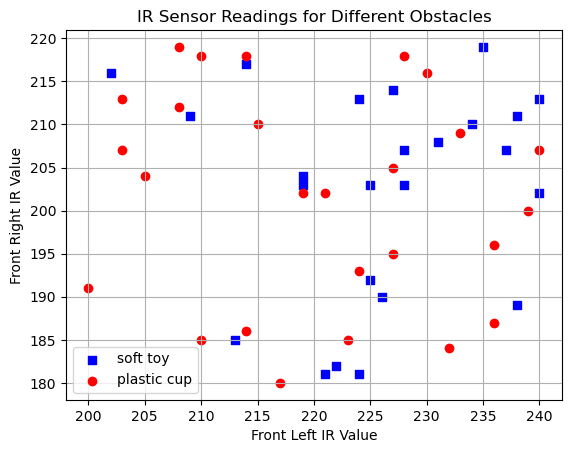

In [6]:
# Plotting

fig, ax = plt.subplots()

for label, group in grouped_data.items():

    ax.scatter(group['front_left'], group['front_right'], marker=group['marker'], color=group['color'], label=label)


ax.legend()


plt.xlabel('Front Left IR Value')

plt.ylabel('Front Right IR Value')

plt.title('IR Sensor Readings for Different Obstacles')

plt.grid(True)

plt.show()

In [7]:
# 4. Implementing & Training k-NN (Orignal Title)

# Split the data into training and test sets.

X = [[row['front_left'], row['front_right']] for row in data]
y = [row['label'] for row in data]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

k = 7  # For simplicity, we'll start with k=3.
knn = KNeighborsClassifier(n_neighbors=k)

# Convert string values to floating-point numbers (data from csv are recongnized as strings)
X_train = [[float(value) for value in row] for row in X_train]
X_test = [[float(value) for value in row] for row in X_test]

# Train the classifier.
knn.fit(X_train, y_train)

# Print out classification report
y_pred_knn = knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

 plastic cup       0.57      0.57      0.57         7
    soft toy       0.62      0.62      0.62         8

    accuracy                           0.60        15
   macro avg       0.60      0.60      0.60        15
weighted avg       0.60      0.60      0.60        15



In [8]:
# 6. Evaluation

y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
accuracy

0.6

### Hyperparameter Tuning
**Challenge**: Wouldnt print the the K values and accuracy scores correctly.

**Solution**: A simple python syntax basically the "f-string" to allow expression in string literals. 

In [9]:
# Define the range of k values to explore
k_values = [1, 3, 5, 7, 9, 11, 13, 15]  # Add more values as needed

# Create lists to store accuracy scores and corresponding k values
accuracy_scores = []
k_values_used = []

# Loop over each value of k
for k in k_values:
    # Create a k-NN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy and store it along with the corresponding k value
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    k_values_used.append(k)

# Print the accuracy scores and corresponding k values
for i in range(len(k_values_used)):
    k = k_values_used[i]
    accuracy = accuracy_scores[i]
    print(f"k = {k}: Accuracy = {accuracy}")

k = 1: Accuracy = 0.3333333333333333
k = 3: Accuracy = 0.5333333333333333
k = 5: Accuracy = 0.6
k = 7: Accuracy = 0.6
k = 9: Accuracy = 0.6666666666666666
k = 11: Accuracy = 0.4
k = 13: Accuracy = 0.6
k = 15: Accuracy = 0.6666666666666666


### Decision tree model comparison
**Challenge**: Code was outputting 1:1 identical results

**Solution**: didnt seperate the knn and tree results i.e accuracy and y_pred

In [10]:
# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create an instance of DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

# Train the Decision Tree classifier
decision_tree.fit(X_train, y_train)

# Make predictions on the test data using the Decision Tree classifier
y_pred_dt = decision_tree.predict(X_test)

# Print out classification report and accuracy for Decision Tree classifier
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

y_pred_knn = knn.predict(X_test)

# Print out classification report and accuracy for k-NN classifier
print("\nk-NN Classifier:")
print(classification_report(y_test, y_pred_knn))
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

Decision Tree Classifier:
              precision    recall  f1-score   support

 plastic cup       0.83      0.45      0.59        11
    soft toy       0.33      0.75      0.46         4

    accuracy                           0.53        15
   macro avg       0.58      0.60      0.52        15
weighted avg       0.70      0.53      0.55        15

Accuracy: 0.5333333333333333

k-NN Classifier:
              precision    recall  f1-score   support

 plastic cup       0.71      0.45      0.56        11
    soft toy       0.25      0.50      0.33         4

    accuracy                           0.47        15
   macro avg       0.48      0.48      0.44        15
weighted avg       0.59      0.47      0.50        15

Accuracy: 0.4666666666666667


### Feature Engineering
**Challenge**: Most of our project was done with the CSV file so early on we struggled with a "value error" telling us that we needed a numerical data.

**Solution**: Converted the values to float point to work with the data and since switching to the pickle file this hasnt impacted the code so we didnt change it.

In [11]:
# Function to compute absolute difference between front_left and front_right sensor values
def compute_sensor_difference(row):
    front_left = float(row['front_left'])  # Convert 'front_left' sensor reading to float
    front_right = float(row['front_right'])  # Convert 'front_right' sensor reading to float
    return abs(front_left - front_right)  # Compute the absolute difference and returns the result


# Loop to compute sensor difference for each data point and add it to the dataset
for row in data:
    row['sensor_difference'] = compute_sensor_difference(row)

# Update X with the new feature
X_with_new_feature = [[row['front_left'], row['front_right'], row['sensor_difference']] for row in data]

# Split the updated data into training and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_with_new_feature, y, test_size=0.3)

# Convert string values to floating-point numbers for X_train_new
X_train_new = [[float(value) for value in row] for row in X_train_new]

# Convert string values to floating-point numbers for X_test_new
X_test_new = [[float(value) for value in row] for row in X_test_new]

# Train the KNN classifier with the updated dataset
knn_new = KNeighborsClassifier(n_neighbors=7)
knn_new.fit(X_train_new, y_train_new)

# The accuracy of the model with the new feature
y_pred_new = knn_new.predict(X_test_new)
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print("Accuracy with new feature:", accuracy_new)

Accuracy with new feature: 0.6


In [12]:
# Split the data into training and test sets.

X = [[float(row['front_left']), float(row['front_right'])] for row in data]
y = [row['label'] for row in data]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

k_folds = KFold(n_splits = 9)

# Calculate cross-validation scores
accuracy_scores = cross_val_score(knn, X, y, cv=k_folds)

k = 3  # For simplicity, we'll start with k=3.
knn = KNeighborsClassifier(n_neighbors=k)

# Convert string values to floating-point numbers (data from csv are recongnized as strings)
X_train = [[float(value) for value in row] for row in X_train]
X_test = [[float(value) for value in row] for row in X_test]

print("Cross Validation Scores: ", [f"{score:.2%}" for score in accuracy_scores])
print("Average CV Score: ", f"{accuracy_scores.mean():.2%}")
print("Number of CV Scores used in Average: ", len(accuracy_scores))

Cross Validation Scores:  ['83.33%', '83.33%', '66.67%', '50.00%', '33.33%', '80.00%', '20.00%', '60.00%', '80.00%']
Average CV Score:  61.85%
Number of CV Scores used in Average:  9


In [13]:
import numpy as np

def plot_confusion_matrix(y_true, y_pred, normalize=False, cmap=plt.cm.Blues):
   
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(conf_matrix))
    plt.xticks(tick_marks, ['Predicted Negative', 'Predicted Positive'])
    plt.yticks(tick_marks, ['Actual Negative', 'Actual Positive'])

    # Add annotations
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

In [ ]:
def classify_obstacle():
    # Read from front infrared sensors.
    front_left = zumi.get_IR_data(IR_FRONT_LEFT)
    front_right = zumi.get_IR_data(IR_FRONT_RIGHT)
    
    prediction = knn.predict([[front_left, front_right]])
    
    # Display the prediction on Zumi's screen
    screen.draw_text("Pred: " + str(prediction[0]))
    
    return prediction[0]

print("Classifying obstacle...")
obstacle_type = classify_obstacle()
obstacle_type

if obstacle_type == 'plastic cup':
    zumi.signal_right_on()
    
if obstacle_type == 'soft toy':    
    zumi.signal_left_on()